In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sympy import sin, cos, tan, atan, sqrt
from sympy import simplify, collect, expand, factor, apart, cancel 
from sympy.core.symbol import symbols, Symbol
from sympy import solveset, linsolve, solve 
from sympy import Eq, Function, Matrix 
from sympy.solvers.ode.systems import dsolve_system


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



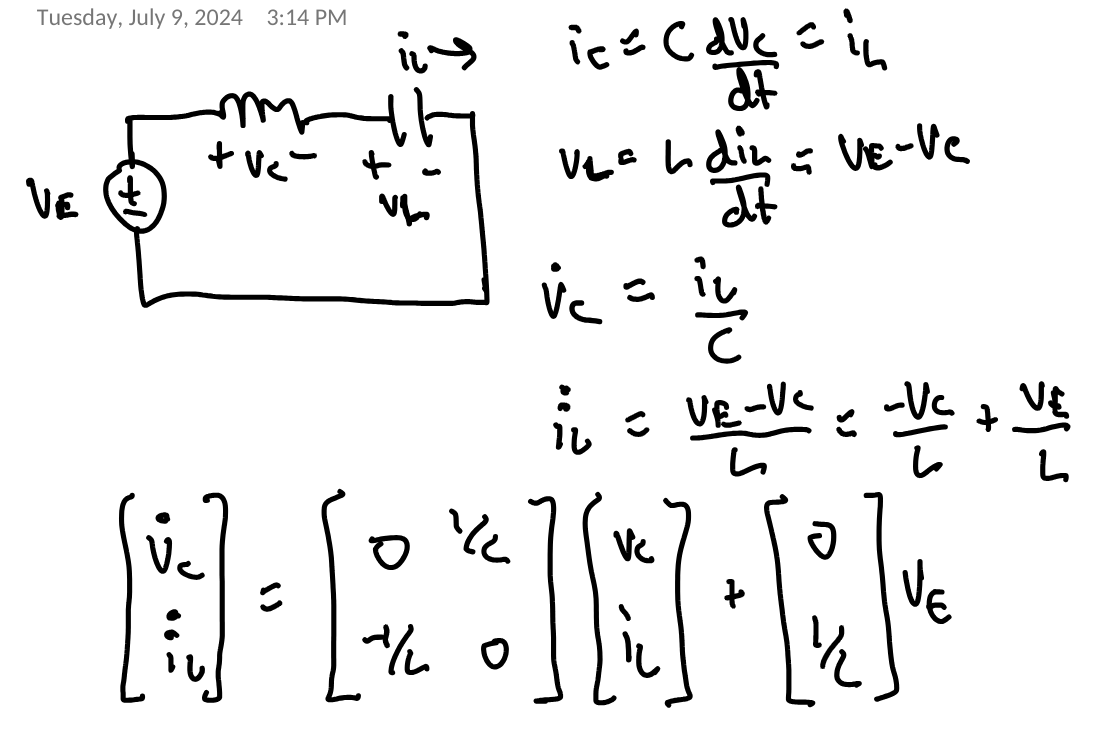

In [10]:
f, g = symbols("f g", cls=Function)
x, y, t = symbols('x y t')
vc = symbols("v_C", real=True, cls=Function)
il = symbols("i_L", real=True, cls=Function)
L = symbols("L", real=True, positive=True)
C = symbols("C", real=True, positive=True)
VE = symbols('V_{E}' ,real=True )
Va = symbols('V_{A}' ,real=True )
Ro = sqrt(L/C)
A = Matrix([[0, 1/C],[-1/L, 0]])
x = Matrix([[vc(t)],[il(t)]])
B = Matrix([[0],[VE/L]])
phi = symbols('phi')
phi
A
x
eqs = x.diff(t) - (A*x+B) 
eqs 

phi

Matrix([
[   0, 1/C],
[-1/L,   0]])

Matrix([
[v_C(t)],
[i_L(t)]])

Matrix([
[          Derivative(v_C(t), t) - i_L(t)/C],
[Derivative(i_L(t), t) - V_{E}/L + v_C(t)/L]])



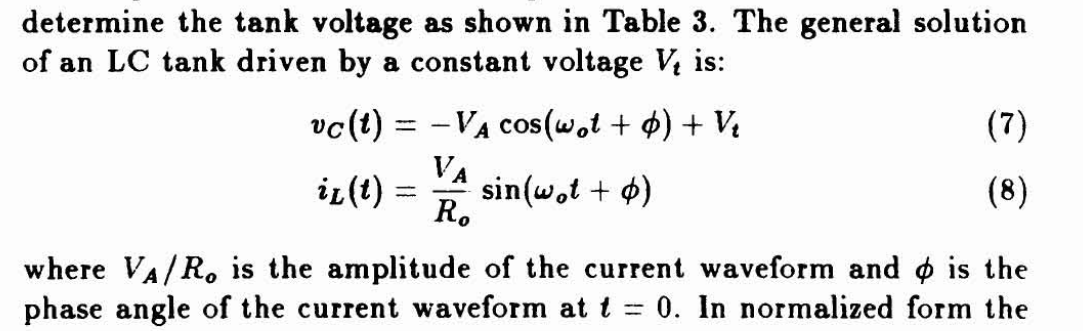

In [12]:
ans = dsolve_system(eqs, ics={vc(t).subs(t, 0): -Va*cos(phi)+VE, il(t).subs(t, 0): (Va/Ro)*sin(phi)})
simplify(simplify(ans[0][0]))
simplify(simplify(ans[0][1]))

Eq(v_C(t), -V_{A}*cos(phi + t/(sqrt(C)*sqrt(L))) + V_{E})

Eq(i_L(t), sqrt(C)*V_{A}*sin(phi + t/(sqrt(C)*sqrt(L)))/sqrt(L))